# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [121]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Lets look at the data attributes and shape
print("Shape of the mouse metadata set is - ", mouse_metadata.shape)
print("---------------------------------------------------------------------------")
print("Shape of the study result set is - ", study_results.shape)

Shape of the mouse metadata set is -  (249, 5)
---------------------------------------------------------------------------
Shape of the study result set is -  (1893, 4)


In [122]:
# Combine the data into a single DataFrame
mouse_Study_Data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
print("Shape of the combines mouse study data set is - ", mouse_Study_Data.shape)
print("---------------------------------------------------------------------------")
mouse_Study_Data.head()

Shape of the combines mouse study data set is -  (1893, 8)
---------------------------------------------------------------------------


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [123]:
# Looking at the null values and other information of the merged data
mouse_Study_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [124]:
# Checking the number of mice.
mouse_count = mouse_Study_Data["Mouse ID"].nunique()
print("Total Mice counts used for the study is", mouse_count)
print("---------------------------------------------------------------------------")
print("Drug regimens tested in the study-")
print(mouse_Study_Data["Drug Regimen"].unique())

Total Mice counts used for the study is 249
---------------------------------------------------------------------------
Drug regimens tested in the study-
['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Propriva' 'Zoniferol' 'Placebo' 'Ceftamin']


In [125]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateIDs = mouse_Study_Data.loc[mouse_Study_Data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicateIDs, "is/are the Mouse ID/s that have duplicates")

['g989'] is/are the Mouse ID/s that have duplicates


In [126]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = mouse_Study_Data[mouse_Study_Data['Mouse ID'].isin(duplicateIDs)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
initial_row_count = len(mouse_Study_Data) 
mouse_Study_Data_clean = mouse_Study_Data.drop_duplicates(subset=['Mouse ID', 'Timepoint']) 
final_row_count = len(mouse_Study_Data_clean) 
dropped_count = initial_row_count - final_row_count
print(f"Initial row count:", initial_row_count) 
print(f"Final row count after dropping duplicates:",final_row_count) 
print(f"Number of rows dropped:", dropped_count)

Initial row count: 1893
Final row count after dropping duplicates: 1888
Number of rows dropped: 5


In [128]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = mouse_Study_Data_clean["Mouse ID"].nunique()
if mouse_count_clean == mouse_count :
    print("We successfully dropped",dropped_count,"rows and retained all",mouse_count_clean,"of the Mouse IDs")
else :
    print("We have wrongly dropped",mouse_count-mouse_count_clean,"Mouse ID/s")

We successfully dropped 5 rows and retained all 249 of the Mouse IDs


## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_stats = mouse_Study_Data_clean.describe()
mouse_study_stats

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,19.597458,50.449276,1.023835,12.792903,25.661547
std,14.084762,8.904565,1.138507,7.186737,3.926776
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951421,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [130]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
    # mean, median, variance, standard deviation, and SEM of the tumor volume.
    # Assemble the resulting series into a single summary DataFrame.

drug_regimen_count = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].count()
drug_regimen_mean = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_regimen_median = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_regimen_var = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_regimen_std = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_regimen_SEM = mouse_Study_Data_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

drug_regimen_summary = pd.DataFrame({   "Tumor Vol. Count": drug_regimen_count,
                                        "Tumor Vol. Mean": drug_regimen_mean,
                                        "Tumor Vol. Median": drug_regimen_median,
                                        "Tumor Vol. Variance": drug_regimen_var,
                                        "Tumor Vol. Std.Deviation": drug_regimen_std,
                                        "Tumor Vol. SEM": drug_regimen_SEM
                                        })
drug_regimen_summary

,Tumor Vol. Count,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Std.Deviation,Tumor Vol. SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [131]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg = mouse_Study_Data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
drug_regimen_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

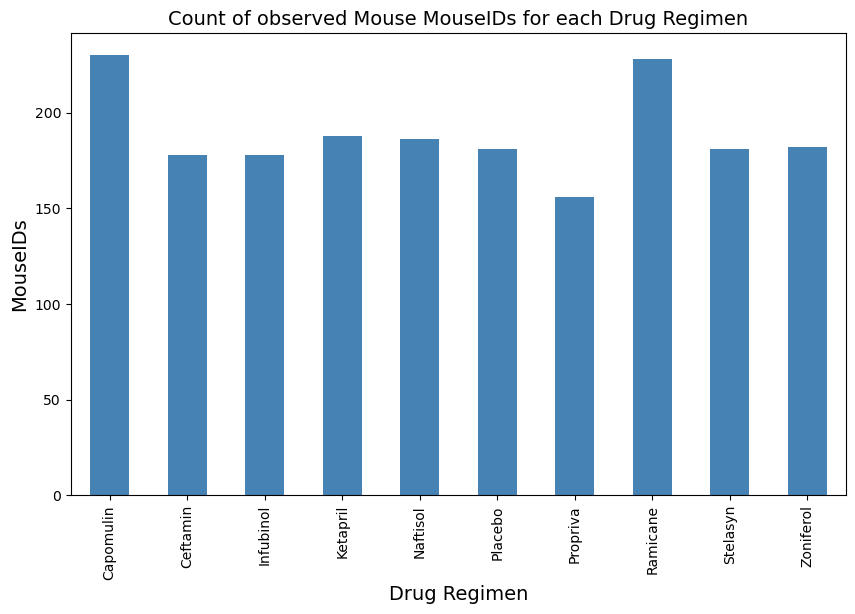

In [161]:
# Generate a bar plot showing the total number of rows Mouse ID for each drug regimen using Pandas.

drug_regimen_mouseID_count = mouse_Study_Data_clean.groupby(["Drug Regimen"])["Mouse ID"].count()

bar_plot = drug_regimen_mouseID_count.plot(kind="bar", color="#4682B4", figsize=(10, 6))

plt.title("Count of observed Mouse MouseIDs for each Drug Regimen",fontsize=14)

plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("MouseIDs", fontsize=14)

plt.show()

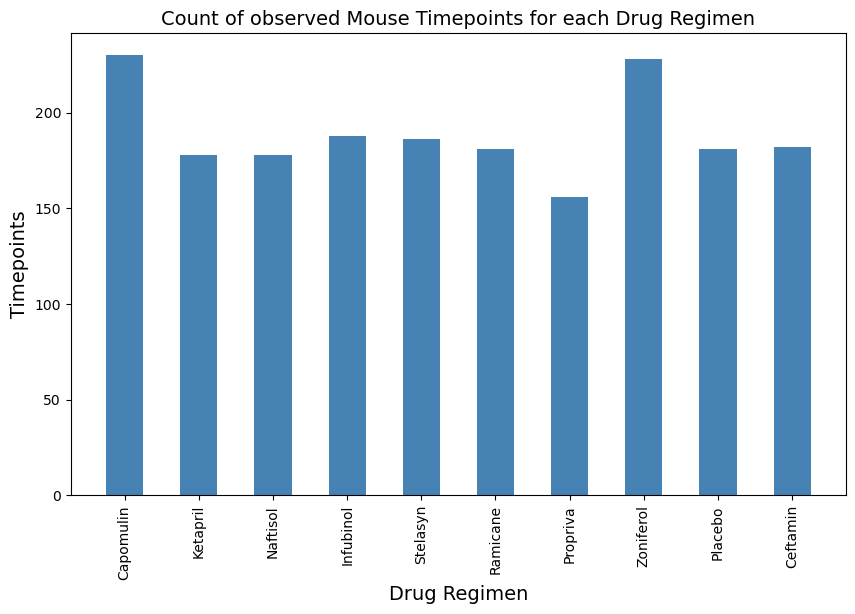

In [ ]:
# Generate a bar plot showing the total number of rows Timepoints for each drug regimen using pyplot.

# Create an array for timepoints
drug_regimen_timepoint_count =mouse_Study_Data_clean.groupby(["Drug Regimen"])["Timepoint"].count()


# Bar pyplot
x_axis = mouse_Study_Data_clean["Drug Regimen"].unique()

fig1, ax1 = plt.subplots(figsize=(10, 6))

plt.bar(x_axis,drug_regimen_timepoint_count, color='#4682B4', width=0.5)


plt.xticks(rotation='vertical')
plt.title("Count of observed Mouse Timepoints for each Drug Regimen",fontsize=14)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Timepoints", fontsize=14)

plt.show()

In [ ]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
